In [43]:
! pip install torchxrayvision

In [44]:
import torchxrayvision as xrv
import skimage, torch, torchvision
import torch

import torchvision.transforms as transforms

## load datasat

In [131]:
%load_ext autoreload
%autoreload 2
import os,sys
sys.path.insert(0,"..")
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import cv2
import pickle
from scipy.ndimage import gaussian_filter


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
transform = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),
                                            xrv.datasets.XRayResizer(224)])

Setting XRayResizer engine to cv2 could increase performance.


In [47]:
d_nih = xrv.datasets.NIH_Dataset(imgpath="/Users/jiashuoli/Desktop/thesis/NIH/images-224",
                                 views=["PA","AP"], unique_patients=False)

In [48]:
d_nih

{'Atelectasis': {0.0: 100561, 1.0: 11559},
 'Cardiomegaly': {0.0: 109344, 1.0: 2776},
 'Consolidation': {0.0: 107453, 1.0: 4667},
 'Edema': {0.0: 109817, 1.0: 2303},
 'Effusion': {0.0: 98803, 1.0: 13317},
 'Emphysema': {0.0: 109604, 1.0: 2516},
 'Fibrosis': {0.0: 110434, 1.0: 1686},
 'Hernia': {0.0: 111893, 1.0: 227},
 'Infiltration': {0.0: 92226, 1.0: 19894},
 'Mass': {0.0: 106338, 1.0: 5782},
 'Nodule': {0.0: 105789, 1.0: 6331},
 'Pleural_Thickening': {0.0: 108735, 1.0: 3385},
 'Pneumonia': {0.0: 110689, 1.0: 1431},
 'Pneumothorax': {0.0: 106818, 1.0: 5302}}


NIH_Dataset num_samples=112120 views=['PA', 'AP'] data_aug=None

In [49]:
index = 23

In [50]:
d_nih.csv.iloc[index]

index                                        23
Image Index                    00000008_000.png
Finding Labels                     Cardiomegaly
Follow-up #                                   0
Patient ID                                    8
Patient Age                                  68
Patient Gender                                F
View Position                                PA
OriginalImage[Width                        2048
Height]                                    2500
OriginalImagePixelSpacing[x               0.171
y]                                        0.171
view                                         PA
has_masks                                 False
patientid                                     8
age_years                                  68.0
sex_male                                  False
sex_female                                 True
Name: 23, dtype: object

{'Atelectasis': 0.0,
 'Cardiomegaly': 1.0,
 'Consolidation': 0.0,
 'Edema': 0.0,
 'Effusion': 0.0,
 'Emphysema': 0.0,
 'Fibrosis': 0.0,
 'Hernia': 0.0,
 'Infiltration': 0.0,
 'Mass': 0.0,
 'Nodule': 0.0,
 'Pleural_Thickening': 0.0,
 'Pneumonia': 0.0,
 'Pneumothorax': 0.0}

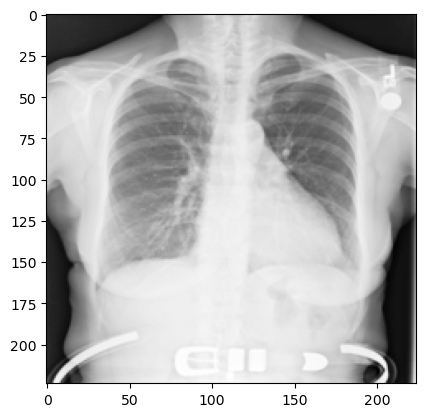

In [51]:
sample = d_nih[index]
plt.imshow(sample["img"][0], cmap="Greys_r")
dict(zip(d_nih.pathologies,sample["lab"]))

In [52]:
print(sample)

{'idx': 23, 'lab': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 'img': array([[[-566.2118 , -614.4    , -638.49414, ..., -718.80786,
         -686.6824 , -606.36865],
        [-606.36865, -614.4    , -638.49414, ..., -726.83923,
         -694.71375, -646.5255 ],
        [-614.4    , -622.4314 , -638.49414, ..., -726.83923,
         -702.7451 , -646.5255 ],
        ...,
        [-574.24316, -485.898  , -622.4314 , ..., -220.86273,
          269.05103,  582.27454],
        [-469.83527, -542.1177 , -654.5569 , ..., -204.79999,
          285.11377,  606.36865],
        [-421.64703, -582.27454, -654.5569 , ..., -188.73724,
          317.23926,  638.49414]]], dtype=float32)}


In [53]:
model = xrv.models.DenseNet(weights="densenet121-res224-all")


In [54]:
str = "00000023_004,00000005_003,00000116_038,00000061_015"

(224, 224)
Setting XRayResizer engine to cv2 could increase performance.


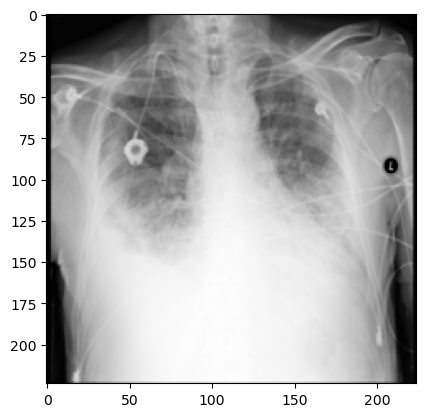

In [55]:
# Prepare the image:
nameIndex = "00000061_015"
img = skimage.io.imread("/Users/jiashuoli/Desktop/thesis/NIH/images-224/"+nameIndex+".png",as_gray=True)
img = xrv.datasets.normalize(img, 255) # convert 8-bit image to [-1024, 1024] range
print(img.shape)
plt.imshow(img, cmap="Greys_r")
transform = torchvision.transforms.Compose([xrv.datasets.XRayResizer(224)])

img_transform = transform(img)
img_torch = torch.from_numpy(img_transform)

In [56]:
model = xrv.models.DenseNet(weights="densenet121-res224-all")
outputs = model(img_torch.unsqueeze(0)) # or model.features(img[None,...]) 

In [57]:
outputs

tensor([[0.5690, 0.5434, 0.5391, 0.5174, 0.5207, 0.5111, 0.5204, 0.5809, 0.5501,
         0.5647, 0.5554, 0.5253, 0.5874, 0.3286, 0.4770, 0.5195, 0.6118, 0.5968]],
       grad_fn=<IndexPutBackward0>)

In [58]:

!pip install torchvision matplotlib

In [59]:
!pip install torchcam

In [60]:
%matplotlib inline
# All imports
import matplotlib.pyplot as plt
import torch
from torch.nn.functional import softmax, interpolate
from torchvision.io.image import read_image
from torchvision.models import resnet18
from torchvision.transforms.functional import normalize, resize, to_pil_image
import torch.nn as nn
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from torchcam.methods import SmoothGradCAMpp, LayerCAM
from torchcam.utils import overlay_mask

In [61]:
model.eval()


XRV-DenseNet121-densenet121-res224-all

In [62]:
model

XRV-DenseNet121-densenet121-res224-all

In [63]:
model.features

Sequential(
  (conv0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu0): ReLU(inplace=True)
  (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (denseblock1): _DenseBlock(
    (denselayer1): _DenseLayer(
      (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace=True)
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu2): ReLU(inplace=True)
      (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
    (denselayer2): _DenseLayer(
      (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace=True)
      (conv1): Conv2d(96, 128, ke

In [64]:
cam_extractor = LayerCAM(model = model,target_layer=model.features.denseblock4,input_shape=(1,224,224))

In [65]:
outputs = model(img_torch.unsqueeze(0)) # or model.features(img[None,...]) 

In [87]:
print(outputs)

torch.Size([1, 18])


In [67]:
print(outputs.squeeze(0).argmax().item())

16


In [68]:

# Retrieve the CAM by passing the class index and the model output
cams = cam_extractor(outputs.squeeze(0).argmax().item(), outputs)

torch.Size([1, 7, 7])


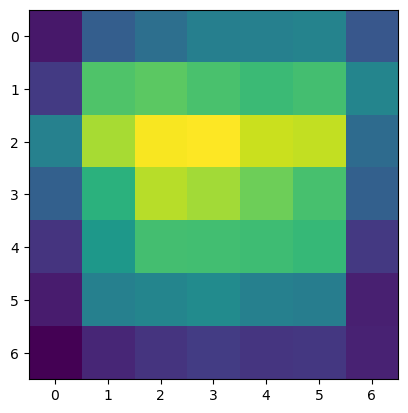

In [69]:

# Notice that there is one CAM per target layer (here only 1)
for cam in cams:
  print(cam.shape)
  plt.imshow(cam[0])
  # # Resize the CAM to the same size as the grayscale image
  # cam_resized = resize(cam.squeeze(), img.shape, anti_aliasing=True)

  # # Normalize the CAM to the range [0, 1]
  # cam_norm = (cam_resized - np.min(cam_resized)) / (np.max(cam_resized) - np.min(cam_resized))

  # # Apply a color map to the normalized CAM to generate a heatmap
  # heatmap = plt.cm.jet(cam_norm)

  # # Overlay the heatmap on top of the grayscale image
  # blended = 0.5 * heatmap[:, :, :3] + 0.5 * np.expand_dims(img, axis=2)

  # # Display the resulting heatmap
  # plt.imshow(blended)
  # plt.axis('off')
  # plt.show()

In [171]:
# cam_resized = resize(cam.squeeze(), (224, 224))
print(type(cam.squeeze()))
cam_resized = cv2.resize(cam.squeeze().numpy(), (224, 224), interpolation=cv2.INTER_CUBIC)
print(cam_resized.shape)

<class 'torch.Tensor'>
(224, 224)


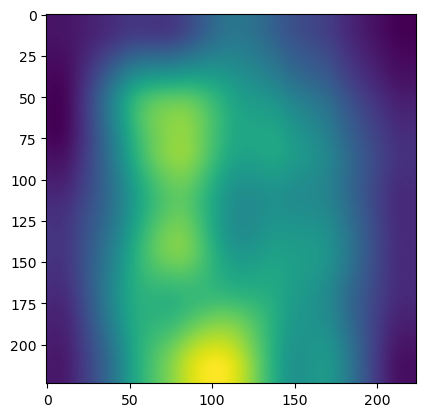

In [172]:
plt.imshow(cam_resized)

In [179]:
# read png picture

# img1 = Image.open("/Users/jiashuoli/Desktop/thesis/NIH/images-224/"+nameIndex+".png")
img1 = Image.open("/Users/jiashuoli/Documents/GitHub/XAI_project/00000010_000.png.png")
# convert into numpy ndarray
img_array = np.array(img1)

#  create new empty RGB channel array
img_rgb1 = np.zeros((*img_array.shape, 3), dtype=np.uint8)

for i in range(3):
    img_rgb1[..., i] = img_array

print(img_rgb1.shape)

(1024, 1024, 3, 3)


TypeError: Invalid shape (1024, 1024, 3, 3) for image data

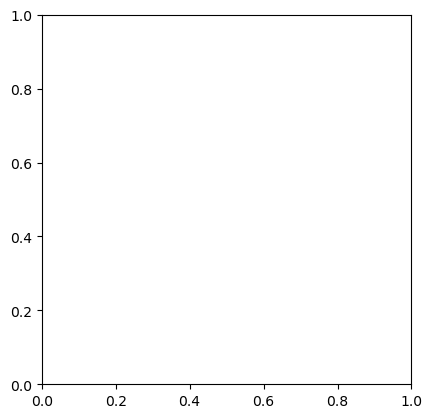

In [180]:
plt.imshow(img_rgb1)
print(type(img_rgb1))

#save the image
# cv2.imwrite(nameIndex+".png", img_rgb1)

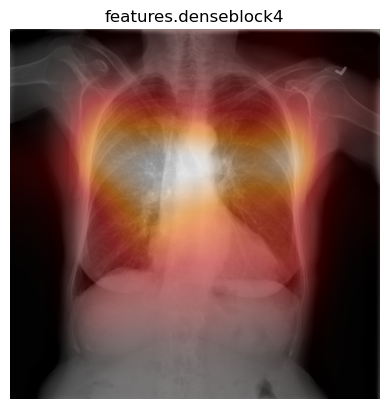

<class 'PIL.Image.Image'>


In [178]:

# Overlayed on the image
for name, cam in zip(cam_extractor.target_names, cams):
  result = overlay_mask(to_pil_image(img_rgb1), to_pil_image(cam.squeeze(0), mode='F'), colormap='gist_heat', alpha=0.5)
  plt.imshow(result); plt.axis('off'); plt.title(name); plt.show()
  print(type(result))
#save the image
#result.save(nameIndex+"_cam.png")

In [17]:
def map_predictions(predictions):
    labels = [
        'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion',
        'Emphysema', 'Enlarged Cardiomediastinum', 'Fibrosis', 'Fracture', 'Hernia',
        'Infiltration', 'Lung Lesion', 'Lung Opacity', 'Mass', 'Nodule',
        'Pleural_Thickening', 'Pneumonia', 'Pneumothorax'
    ]

    return  list(zip(labels, predictions))


In [18]:
labels = [
        'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion',
        'Emphysema', 'Enlarged Cardiomediastinum', 'Fibrosis', 'Fracture', 'Hernia',
        'Infiltration', 'Lung Lesion', 'Lung Opacity', 'Mass', 'Nodule',
        'Pleural_Thickening', 'Pneumonia', 'Pneumothorax'
    ]

In [25]:
import numpy as np
from matplotlib import cm
from PIL import Image

In [27]:
def overlay_mask_1024(img: Image.Image, mask: Image.Image, colormap: str = "jet", alpha: float = 0.7) -> Image.Image:
    """Overlay a colormapped mask on a background image
    >>> from PIL import Image
    >>> import matplotlib.pyplot as plt
    >>> from torchcam.utils import overlay_mask
    >>> img = ...
    >>> cam = ...
    >>> overlay = overlay_mask(img, cam)
    Args:
        img: background image
        mask: mask to be overlayed in grayscale
        colormap: colormap to be applied on the mask
        alpha: transparency of the background image
    Returns:
        overlayed image
    Raises:
        TypeError: when the arguments have invalid types
        ValueError: when the alpha argument has an incorrect value
    """

    if not isinstance(img, Image.Image) or not isinstance(mask, Image.Image):
        raise TypeError("img and mask arguments need to be PIL.Image")

    if not isinstance(alpha, float) or alpha < 0 or alpha >= 1:
        raise ValueError("alpha argument is expected to be of type float between 0 and 1")

    cmap = cm.get_cmap(colormap)
    # Resize mask and apply colormap
    overlay = mask.resize(img.size, resample=Image.BICUBIC)
    overlay = (1025 * cmap(np.asarray(overlay) ** 2)[:, :, :3]).astype(np.uint8)
    # Overlay the image with the mask
    overlayed_img = Image.fromarray((alpha * np.asarray(img) + (1 - alpha) * overlay).astype(np.uint8))

    return overlayed_img

(1024, 1024)
(1024, 1024, 3)


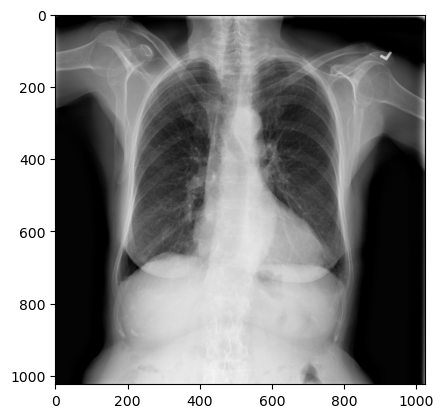

In [41]:
sample_path = "/Users/jiashuoli/Desktop/thesis/NIH/sample-full1/"

# for all the images in the sample folder, we need to resize the cam to the same size as the original image
# and then overlay the cam on the original image

# for each image in the sample folder
for nameIndex in os.listdir(sample_path):
    sample_img = skimage.io.imread(sample_path+nameIndex,as_gray=True)
    print(sample_img.shape)
        #  create new empty RGB channel array
    img_rgb11 = np.zeros((*sample_img.shape, 3), dtype=np.uint8)

    for i in range(3):
        img_rgb11[..., i] = sample_img
    print(img_rgb11.shape)
    plt.imshow(img_rgb11)

In [124]:
# method 1: read the original high resolution image and resize the cam to the same size as the original image

# read png picture

sample_path = "/Users/jiashuoli/Desktop/thesis/NIH/for_pkl/"

# for all the images in the sample folder, we need to resize the cam to the same size as the original image
# and then overlay the cam on the original image

# for each image in the sample folder
for nameIndex in os.listdir(sample_path):
    sample_img = skimage.io.imread(sample_path+nameIndex,as_gray=True)

    #  create new empty RGB channel array
    img_rgb1 = np.zeros((*sample_img.shape, 3), dtype=np.uint8)

    for i in range(3):
        img_rgb1[..., i] = sample_img
    # prepare the image
    resize_img = xrv.datasets.normalize(sample_img, 1025) 
    image_dump = torch.from_numpy(resize_img).unsqueeze(0)

    # plt.imshow(resize_img, cmap="Greys_r")
    transform = torchvision.transforms.Compose([xrv.datasets.XRayResizer(224)])
    img_transform = transform(resize_img)
    img_torch = torch.from_numpy(img_transform)
    
    # feed the image to the model
    outputs = model(img_torch.unsqueeze(0)) # or model.features(img[None,...]) 
    print((map_predictions(outputs.squeeze().detach().numpy())))
    pred = outputs.squeeze().detach().numpy()
    
    # we have 18 predictions for each image, for each prediction, we have a cam
   
    cam_list = []
    #generate a list of 18 index
    index_list = list(range(18))
    for i in index_list:
        temp_extractor = LayerCAM(model = model,target_layer=model.features.denseblock4,input_shape=(1,224,224))
        outputs = model(img_torch.unsqueeze(0))
        cam_result = temp_extractor(i, outputs)
        cam_list.append(cam_result)
        for cam in cam_result:
            #print(cam.shape)
            cam_resized = resize(cam.squeeze(), (1024,1024))
            map_dump = torch.from_numpy(cam_resized).unsqueeze(0).unsqueeze(0)
            result_dict = {
                'map': map_dump,
                'prob': pred[i],
                'task': labels[i],
                'gt': 0,
                'cxr_img': image_dump,
                'cxr_dims': (1024,1024)
            }
        
            # Specify the output folder and file name
            output_folder = '/Users/jiashuoli/Desktop/thesis/NIH/pkl/'+nameIndex+'/'
        
            # Create the output folder if it doesn't exist
            os.makedirs(output_folder, exist_ok=True)

            # Dump the dictionary into a .pickle file in the specified folder
            with open(output_folder+labels[i]+"_map"+".pkl", 'wb') as f:
                pickle.dump(result_dict, f)
 

Setting XRayResizer engine to cv2 could increase performance.
[('Atelectasis', 0.24613942), ('Cardiomegaly', 0.03629454), ('Consolidation', 0.0012347604), ('Edema', 0.005125164), ('Effusion', 0.006108969), ('Emphysema', 0.2944702), ('Enlarged Cardiomediastinum', 0.00029944672), ('Fibrosis', 0.012295028), ('Fracture', 0.028232891), ('Hernia', 0.11343457), ('Infiltration', 0.23320186), ('Lung Lesion', 0.030274374), ('Lung Opacity', 0.091216706), ('Mass', 0.39175844), ('Nodule', 0.005228615), ('Pleural_Thickening', 0.524013), ('Pneumonia', 0.058294773), ('Pneumothorax', 0.1835961)]
Setting XRayResizer engine to cv2 could increase performance.
[('Atelectasis', 0.1627934), ('Cardiomegaly', 0.025368271), ('Consolidation', 0.0011194858), ('Edema', 0.0029705411), ('Effusion', 0.004420552), ('Emphysema', 0.14413276), ('Enlarged Cardiomediastinum', 0.00020761581), ('Fibrosis', 0.008209034), ('Fracture', 0.021430159), ('Hernia', 0.09105279), ('Infiltration', 0.18941975), ('Lung Lesion', 0.0220290

In [113]:
with open('/Users/jiashuoli/Desktop/thesis/NIH/sample_full3/nameIndex/Effusion.pickle', 'rb') as file:
    data = pickle.load(file)


In [117]:
print(data['prob'])

0.0046098894


Setting XRayResizer engine to cv2 could increase performance.
torch.Size([1, 224, 224])
[('Atelectasis', 0.18078642), ('Cardiomegaly', 0.025782257), ('Consolidation', 0.0007971347), ('Edema', 0.0032990363), ('Effusion', 0.0046098894), ('Emphysema', 0.22561738), ('Enlarged Cardiomediastinum', 0.00017371679), ('Fibrosis', 0.0081633), ('Fracture', 0.02183572), ('Hernia', 0.07534102), ('Infiltration', 0.16891542), ('Lung Lesion', 0.022033399), ('Lung Opacity', 0.060423993), ('Mass', 0.2890563), ('Nodule', 0.004010325), ('Pleural_Thickening', 0.5206306), ('Pneumonia', 0.048297588), ('Pneumothorax', 0.14084044)]
[[0.20652431 0.20462455 0.2027248  ... 0.2742821  0.27469647 0.27511084]
 [0.20497541 0.20308399 0.20119257 ... 0.27315706 0.2735705  0.27398396]
 [0.20342652 0.20154344 0.19966036 ... 0.272032   0.27244455 0.2728571 ]
 ...
 [0.4846828  0.48167676 0.4786707  ... 0.41655937 0.41873577 0.4209122 ]
 [0.48551857 0.48251024 0.4795019  ... 0.41783935 0.42000932 0.42217928]
 [0.48635435 0.4

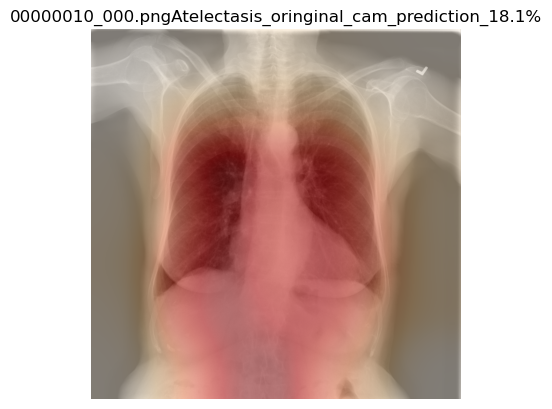

[[0.18371375 0.18141961 0.17912546 ... 0.24625844 0.24781641 0.24937437]
 [0.18349347 0.18120556 0.17891763 ... 0.24600153 0.24756077 0.24912   ]
 [0.1832732  0.1809915  0.1787098  ... 0.24574462 0.24730512 0.24886563]
 ...
 [0.33131123 0.32856098 0.32581073 ... 0.28536367 0.2876018  0.28983992]
 [0.33226284 0.32950935 0.32675585 ... 0.28706333 0.28930646 0.29154956]
 [0.33321446 0.33045772 0.327701   ... 0.28876302 0.2910111  0.2932592 ]]


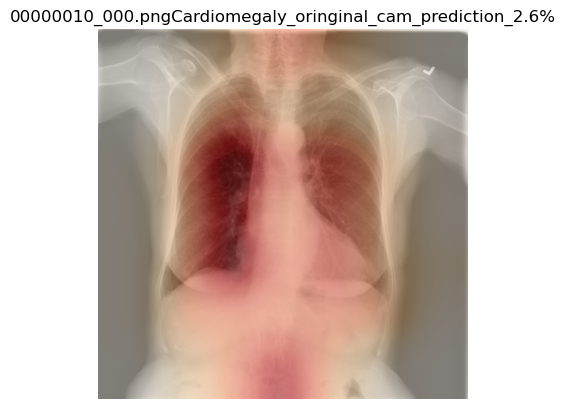

[[0.29384902 0.29185906 0.2898691  ... 0.28497714 0.28542972 0.28588226]
 [0.2927219  0.29073724 0.28875262 ... 0.28399113 0.28444445 0.28489777]
 [0.29159474 0.28961542 0.2876361  ... 0.28300515 0.28345922 0.28391328]
 ...
 [0.26267436 0.25994956 0.25722477 ... 0.31934273 0.31957462 0.31980652]
 [0.26348338 0.26076004 0.2580367  ... 0.31982824 0.32005692 0.32028556]
 [0.26429236 0.2615705  0.25884867 ... 0.32031378 0.32053918 0.3207646 ]]


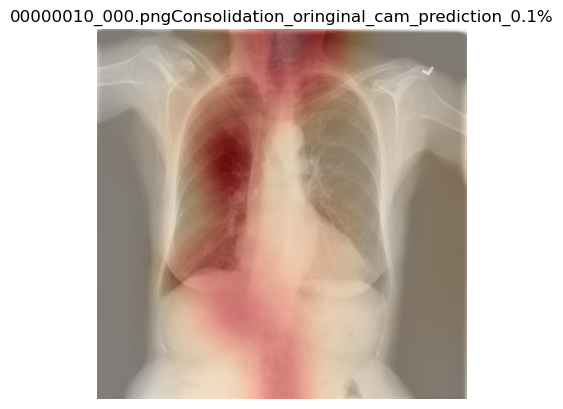

[[0.18573286 0.18370064 0.1816684  ... 0.37944335 0.38005343 0.38066348]
 [0.18415077 0.1821331  0.18011542 ... 0.376969   0.3775718  0.37817454]
 [0.18256868 0.18056557 0.17856245 ... 0.3744947  0.37509015 0.3756856 ]
 ...
 [0.36559528 0.3634215  0.36124775 ... 0.40099365 0.4028618  0.40473   ]
 [0.36700842 0.36481804 0.36262769 ... 0.4035277  0.40540838 0.40728906]
 [0.36842155 0.36621457 0.36400762 ... 0.40606177 0.40795496 0.40984812]]


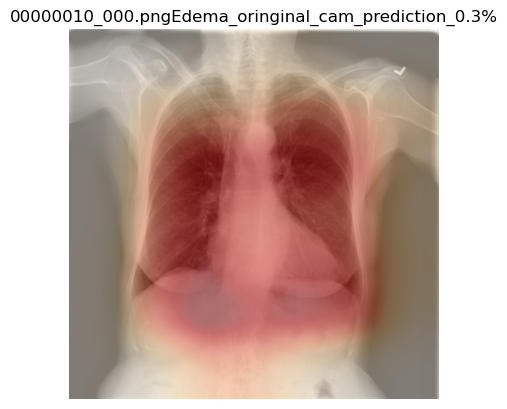

[[0.29094958 0.28810924 0.2852689  ... 0.3258968  0.32779697 0.32969713]
 [0.28953147 0.28669462 0.28385776 ... 0.32485056 0.32674503 0.3286395 ]
 [0.28811336 0.28528    0.2824466  ... 0.32380432 0.32569313 0.3275819 ]
 ...
 [0.41442057 0.41056404 0.40670753 ... 0.39666933 0.39861953 0.40056974]
 [0.41526875 0.41140622 0.4075437  ... 0.39757872 0.39953524 0.4014918 ]
 [0.41611692 0.4122484  0.40837988 ... 0.3984881  0.40045097 0.40241382]]


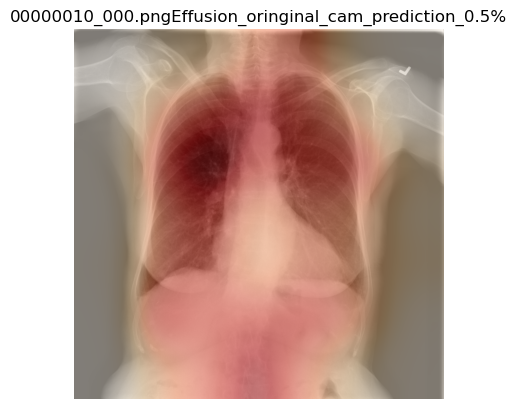

[[0.23231526 0.230337   0.22835872 ... 0.28956592 0.2912242  0.2928825 ]
 [0.23043168 0.22846255 0.22649342 ... 0.28717682 0.28882673 0.29047665]
 [0.2285481  0.2265881  0.2246281  ... 0.2847877  0.28642926 0.2880708 ]
 ...
 [0.41977936 0.41730168 0.414824   ... 0.39060256 0.39301518 0.3954278 ]
 [0.42072555 0.4182429  0.41576025 ... 0.3921689  0.3945796  0.39699027]
 [0.42167172 0.4191841  0.4166965  ... 0.39373523 0.396144   0.39855275]]


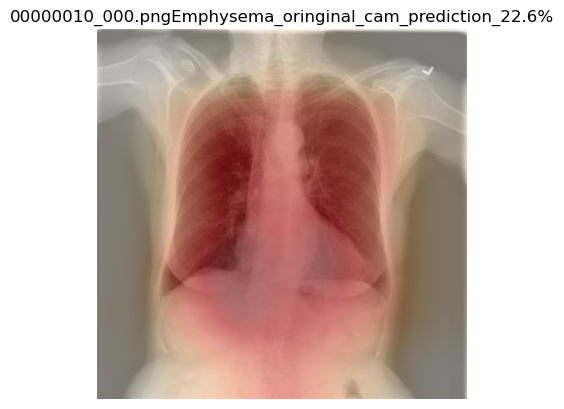

[[0.14536196 0.14337102 0.14138009 ... 0.22405885 0.2245362  0.22501354]
 [0.14438833 0.14241093 0.14043355 ... 0.2228545  0.22333178 0.22380906]
 [0.1434147  0.14145085 0.139487   ... 0.22165015 0.22212736 0.22260459]
 ...
 [0.29328898 0.29033494 0.2873809  ... 0.32188594 0.32299444 0.3241029 ]
 [0.29417786 0.2912151  0.28825235 ... 0.32257143 0.323675   0.3247786 ]
 [0.29506674 0.29209527 0.2891238  ... 0.3232569  0.3243556  0.3254543 ]]


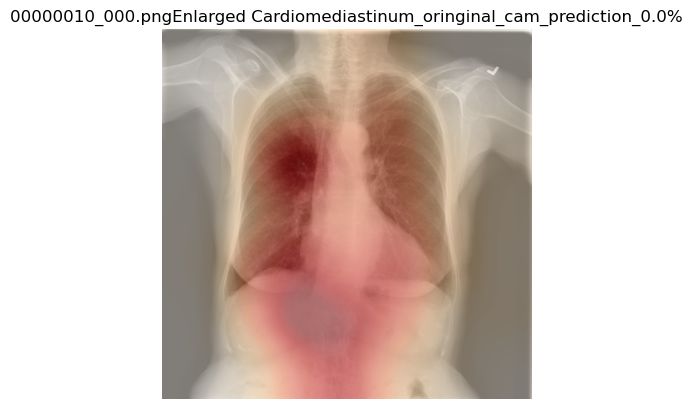

[[0.12722935 0.12568717 0.124145   ... 0.25140828 0.25123402 0.25105977]
 [0.12691174 0.12537679 0.12384183 ... 0.2512101  0.25103197 0.25085384]
 [0.12659414 0.1250664  0.12353866 ... 0.25101194 0.2508299  0.2506479 ]
 ...
 [0.3361839  0.3332706  0.3303573  ... 0.45379108 0.45500842 0.45622575]
 [0.33641133 0.33349615 0.330581   ... 0.45434257 0.45555934 0.45677614]
 [0.33663872 0.33372173 0.3308047  ... 0.45489404 0.4561103  0.45732656]]


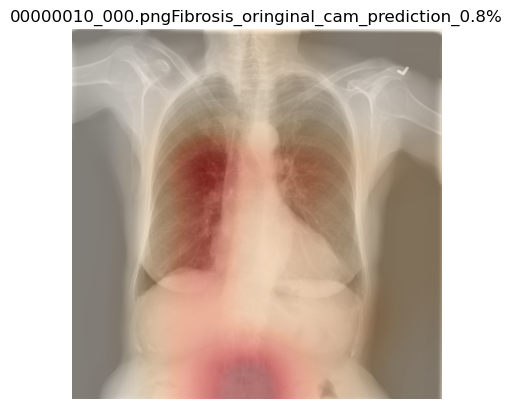

[[0.23871617 0.2356547  0.23259322 ... 0.33916485 0.34092027 0.3426757 ]
 [0.23775706 0.23470692 0.23165677 ... 0.3380984  0.33985    0.3416016 ]
 [0.23679796 0.23375914 0.23072033 ... 0.337032   0.33877975 0.34052753]
 ...
 [0.23832026 0.23576291 0.23320556 ... 0.30286682 0.30469295 0.30651906]
 [0.23928675 0.23672633 0.2341659  ... 0.30451    0.3063265  0.30814302]
 [0.24025324 0.23768975 0.23512627 ... 0.30615318 0.30796006 0.30976698]]


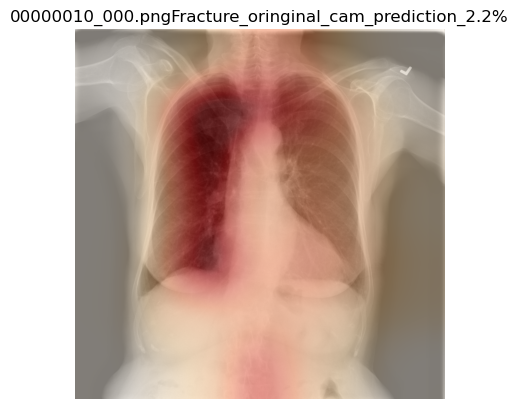

[[0.23593292 0.23416576 0.2323986  ... 0.22378777 0.22506754 0.2263473 ]
 [0.23343503 0.23168188 0.22992872 ... 0.2212235  0.22249232 0.22376113]
 [0.23093715 0.229198   0.22745883 ... 0.21865925 0.2199171  0.22117496]
 ...
 [0.36452731 0.36193505 0.35934278 ... 0.3683088  0.370704   0.37309918]
 [0.36635134 0.36375082 0.3611503  ... 0.37020162 0.37260792 0.37501422]
 [0.36817536 0.36556658 0.3629578  ... 0.37209445 0.37451187 0.37692928]]


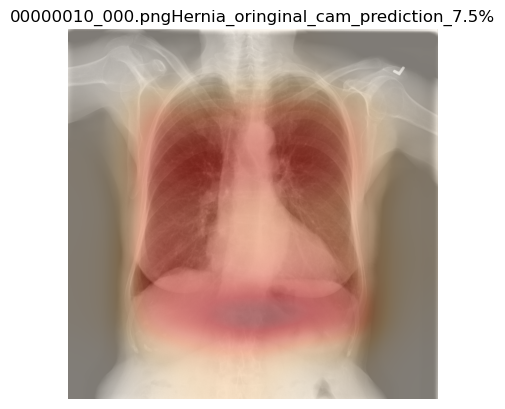

[[0.24462366 0.24253099 0.24043833 ... 0.2335887  0.23514733 0.23670594]
 [0.24271235 0.24062844 0.23854452 ... 0.23210032 0.23365279 0.23520525]
 [0.24080102 0.23872587 0.23665072 ... 0.23061195 0.23215826 0.23370455]
 ...
 [0.45867184 0.45610854 0.45354524 ... 0.3548914  0.35715604 0.35942072]
 [0.4593532  0.45678547 0.4542177  ... 0.35620242 0.358466   0.36072958]
 [0.46003458 0.45746237 0.4548902  ... 0.35751346 0.35977593 0.3620384 ]]


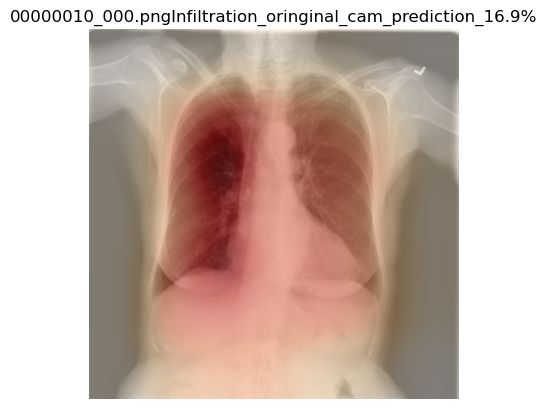

[[0.21305478 0.21095063 0.20884646 ... 0.32861564 0.32970428 0.3307929 ]
 [0.2111366  0.20904744 0.20695828 ... 0.32626075 0.3273434  0.3284261 ]
 [0.2092184  0.20714425 0.20507008 ... 0.32390586 0.32498255 0.32605925]
 ...
 [0.4892728  0.48505086 0.4808289  ... 0.5232491  0.5268178  0.53038657]
 [0.48935762 0.4851432  0.48092884 ... 0.52409714 0.5276497  0.5312022 ]
 [0.4894424  0.48523557 0.48102874 ... 0.5249452  0.52848154 0.5320178 ]]


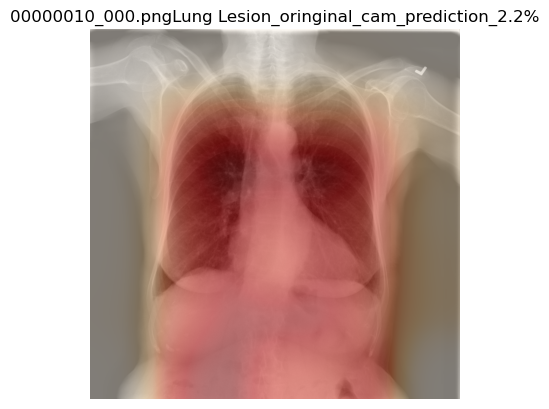

[[0.1739942  0.17226142 0.17052864 ... 0.19237533 0.19369856 0.19502178]
 [0.17293073 0.17120947 0.1694882  ... 0.19099024 0.19230466 0.19361907]
 [0.17186727 0.17015752 0.16844779 ... 0.18960516 0.19091076 0.19221635]
 ...
 [0.34031764 0.33670416 0.33309066 ... 0.3018348  0.30488122 0.30792764]
 [0.34053183 0.33692378 0.3333157  ... 0.30255517 0.3055944  0.30863366]
 [0.34074602 0.3371434  0.33354077 ... 0.30327553 0.3063076  0.3093397 ]]


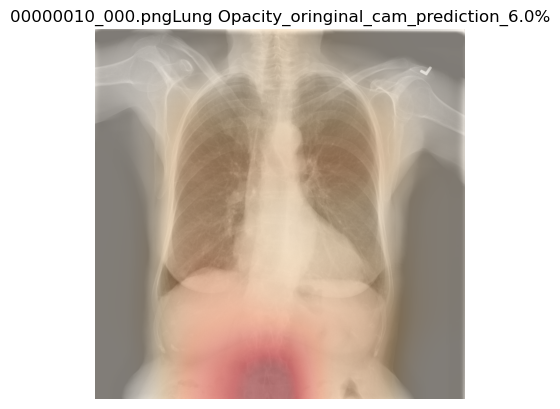

[[0.19533023 0.19364008 0.19194993 ... 0.27120116 0.27186573 0.27253032]
 [0.19335744 0.1916807  0.19000396 ... 0.26872346 0.26938045 0.27003744]
 [0.19138466 0.18972132 0.18805799 ... 0.26624578 0.26689517 0.2675446 ]
 ...
 [0.48077875 0.47733557 0.4738924  ... 0.40966696 0.41160688 0.4135468 ]
 [0.48209718 0.47865114 0.4752051  ... 0.41171703 0.41365814 0.41559926]
 [0.4834156  0.4799667  0.4765178  ... 0.41376713 0.4157094  0.4176517 ]]


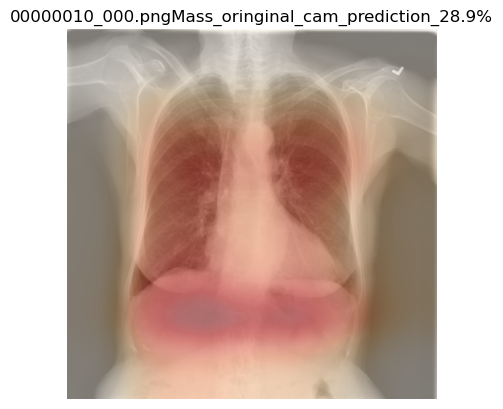

[[0.19091327 0.18884856 0.18678384 ... 0.21812128 0.21896158 0.21980189]
 [0.1892129  0.18716384 0.18511477 ... 0.21649233 0.21732856 0.2181648 ]
 [0.18751255 0.18547913 0.1834457  ... 0.21486339 0.21569555 0.2165277 ]
 ...
 [0.28135905 0.27827752 0.27519602 ... 0.28601015 0.28750148 0.2889928 ]
 [0.2827639  0.27967274 0.2765816  ... 0.2868353  0.28831917 0.28980306]
 [0.28416875 0.28106797 0.27796715 ... 0.28766048 0.2891369  0.2906133 ]]


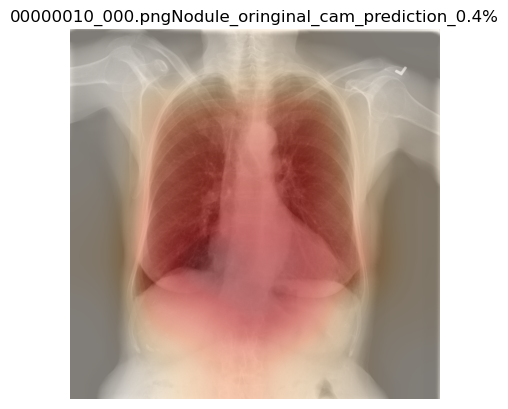

[[0.20023443 0.19831392 0.19639342 ... 0.30870438 0.30953935 0.31037432]
 [0.19800508 0.19610375 0.19420242 ... 0.30598158 0.3068071  0.3076326 ]
 [0.19577573 0.19389358 0.19201145 ... 0.3032588  0.30407485 0.3048909 ]
 ...
 [0.45699516 0.45320213 0.44940907 ... 0.4547434  0.45727944 0.4598155 ]
 [0.4581956  0.45439905 0.4506025  ... 0.45628318 0.4588216  0.46136004]
 [0.45939603 0.45559597 0.45179594 ... 0.457823   0.46036378 0.46290454]]


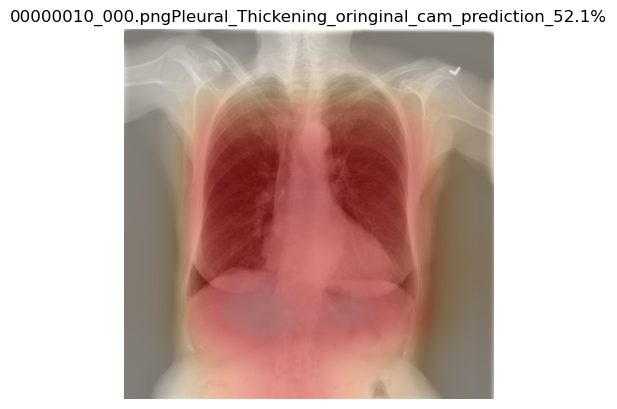

[[0.1888456  0.18657771 0.1843098  ... 0.18893348 0.19014363 0.19135378]
 [0.1872043  0.18495442 0.18270454 ... 0.18757199 0.18877785 0.1899837 ]
 [0.185563   0.18333115 0.1810993  ... 0.1862105  0.18741205 0.18861361]
 ...
 [0.35199052 0.34876996 0.34554937 ... 0.2971339  0.29947174 0.30180958]
 [0.353193   0.34996474 0.34673646 ... 0.2984827  0.3008137  0.30314472]
 [0.3543955  0.3511595  0.34792355 ... 0.29983148 0.3021557  0.3044799 ]]


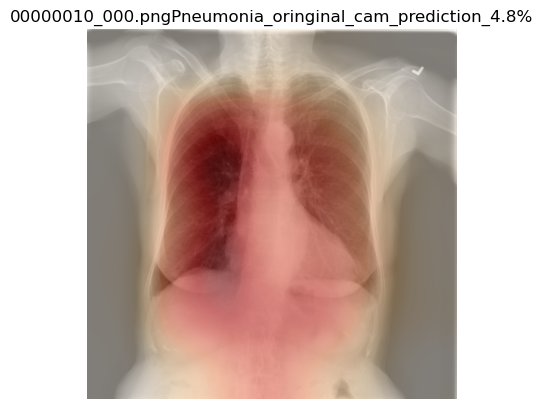

[[0.20452945 0.20229681 0.20006417 ... 0.126376   0.12763946 0.1289029 ]
 [0.20325857 0.20104374 0.19882892 ... 0.1256694  0.12693009 0.12819076]
 [0.20198768 0.19979067 0.19759366 ... 0.12496281 0.12622072 0.12747863]
 ...
 [0.33636433 0.333369   0.33037364 ... 0.2782675  0.28080854 0.2833496 ]
 [0.33670482 0.3337091  0.3307134  ... 0.2782401  0.28077522 0.2833103 ]
 [0.33704528 0.3340492  0.33105314 ... 0.27821273 0.28074187 0.283271  ]]


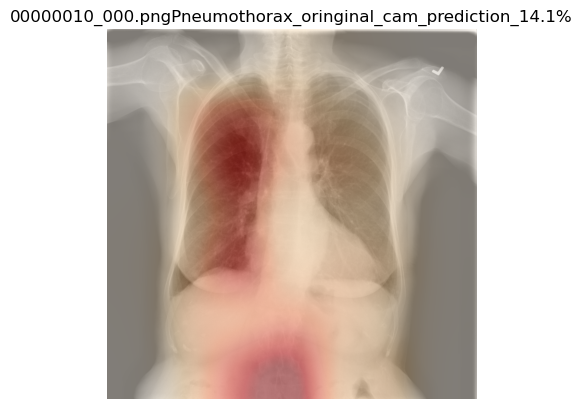

In [155]:
# method 1: read the original high resolution image and resize the cam to the same size as the original image

# read png picture

sample_path = "/Users/jiashuoli/Desktop/thesis/NIH/sample_full3/"

# for all the images in the sample folder, we need to resize the cam to the same size as the original image
# and then overlay the cam on the original image

# for each image in the sample folder
for nameIndex in os.listdir(sample_path):
    sample_img = skimage.io.imread(sample_path+nameIndex,as_gray=True)

    #  create new empty RGB channel array
    img_rgb1 = np.zeros((*sample_img.shape, 3), dtype=np.uint8)

    for i in range(3):
        img_rgb1[..., i] = sample_img
    # prepare the image
    resize_img = xrv.datasets.normalize(sample_img, 1025) 
    # plt.imshow(resize_img, cmap="Greys_r")
    transform = torchvision.transforms.Compose([xrv.datasets.XRayResizer(224)])
    img_transform = transform(resize_img)
    img_torch = torch.from_numpy(img_transform)
    print(img_torch.shape)
    # feed the image to the model
    outputs = model(img_torch.unsqueeze(0)) # or model.features(img[None,...]) 
    # print(outputs.squeeze().detach().numpy())
    print((map_predictions(outputs.squeeze().detach().numpy())))
    pred = outputs.squeeze().detach().numpy()
    
    # we have 18 predictions for each image, for each prediction, we have a cam
    cam_list = []
    #generate a list of 18 index
    index_list = list(range(18))
    for i in index_list:
        temp_extractor = LayerCAM(model = model,target_layer=model.features.denseblock4,input_shape=(1,224,224))
        outputs = model(img_torch.unsqueeze(0))
        cam_result = temp_extractor(i, outputs)
        cam_list.append(cam_result)
        for cam in cam_result:
            #print(cam.shape)
            cam_resized = resize(cam.squeeze(), (1024,1024))
            print(cam_resized)

            #save the picture, in a new folder called avtivition map
            folder_path = sample_path + nameIndex +"activation_map/"
            # if not os.path.exists(folder_path):
            #     os.makedirs(folder_path)
            file_name = nameIndex+"_"+labels[i]+"{:.3f}".format(pred[i])+"_cam.png"
            full_path_map = folder_path + file_name
            # plt.imsave(full_path_map, cam_resized, cmap='jet')
            
            
            # print(labels[i],)
            # plt.imshow(cam_resized)
            # Overlayed on the image
            
            result = overlay_mask(to_pil_image(img_rgb1), to_pil_image(cam.squeeze(0), mode='F'), colormap='jet', alpha=0.5)
            # plt.imshow(result); plt.axis('off'); plt.title(nameIndex+labels[i]+"_oringinal_cam_"+"prediction_"+"{:.1f}".format(pred[i]*100) + "%"); 
            # plt.show()
            
            #save the image
            full_path_cam = full_path_map+"_"+labels[i]+"prediction_"+"{:.1f}".format(pred[i]*100) + "%"+"_oringinal_cam.png"
            # result.save(full_path_cam)
            
            
            #save the image to another folder, create a nrefolder called cam_resualt, and name the image as the original image name + label+prediction
            #plt.savefig(nameIndex+"_"+labels[i]+"_"+str(outputs.squeeze().detach().numpy().tolist()[i])+".png")


            # method2: generate the cam and the heatmap overlay, but preprocess the cam matrix that the value that is lower than 0.5 will be set to 0
            filtered_cam = np.where(cam_resized < 0.8, 0, cam_resized)
            smoothed_matrix = gaussian_filter(filtered_cam, sigma=1)

            filtered_result = overlay_mask(to_pil_image(img_rgb1), to_pil_image(cam.squeeze(0), mode='F'), colormap='OrRd', alpha=0.5) 
            plt.imshow(filtered_result); plt.axis('off'); plt.title(nameIndex+labels[i]+"_oringinal_cam_"+"prediction_"+"{:.1f}".format(pred[i]*100) + "%")
            plt.show()



In [83]:
print(img_torch.shape)

torch.Size([1, 224, 224])


In [130]:
import numpy as np
from scipy.ndimage import gaussian_filter

# Create a sample CAM matrix (replace this with your actual CAM matrix)
cam_matrix = np.random.rand(10, 10)

# Set values less than 0.5 to 0
thresholded_matrix = np.where(cam_matrix < 0.5, 0, cam_matrix)

# Smooth the edges using a Gaussian filter
smoothed_matrix = gaussian_filter(thresholded_matrix, sigma=1)

# Print the matrices for comparison
print("Original CAM matrix:")
print(cam_matrix)
print("\nThresholded matrix (values < 0.5 set to 0):")
print(thresholded_matrix)
print("\nSmoothed matrix:")
print(smoothed_matrix)


Original CAM matrix:
[[0.71518937 0.60276338 0.54488318 0.4236548  0.64589411 0.43758721
  0.891773   0.96366276 0.38344152 0.79172504]
 [0.52889492 0.56804456 0.92559664 0.07103606 0.0871293  0.0202184
  0.83261985 0.77815675 0.87001215 0.97861834]
 [0.79915856 0.46147936 0.78052918 0.11827443 0.63992102 0.14335329
  0.94466892 0.52184832 0.41466194 0.26455561]
 [0.77423369 0.45615033 0.56843395 0.0187898  0.6176355  0.61209572
  0.616934   0.94374808 0.6818203  0.3595079 ]
 [0.43703195 0.6976312  0.06022547 0.66676672 0.67063787 0.21038256
  0.1289263  0.31542835 0.36371077 0.57019677]
 [0.43860151 0.98837384 0.10204481 0.20887676 0.16130952 0.65310833
  0.2532916  0.46631077 0.24442559 0.15896958]
 [0.11037514 0.65632959 0.13818295 0.19658236 0.36872517 0.82099323
  0.09710128 0.83794491 0.09609841 0.97645947]
 [0.4686512  0.97676109 0.60484552 0.73926358 0.03918779 0.28280696
  0.12019656 0.2961402  0.11872772 0.31798318]
 [0.41426299 0.0641475  0.69247212 0.56660145 0.26538949 0.5